## Q1:


## Importing Libraries:

In [25]:
import numpy as np 
import pickle
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from matplotlib import pyplot as plt

## Function for calculation of Bais:

In [26]:
def bias(exp_values,y_test):
	ans=0.00
	for i in range(len(y_test)):
		temp=(y_test[i]-np.mean(exp_values[:,i]))
		temp*=temp
		ans+=temp
	ans/=len(y_test)
	return ans 

##  Function for calulation of Varience:

In [27]:
def variance(exp_values,y_test):
	ans=0.0
	for i in range(500):
		# print(exp_values[i].shape)
		ans+=(np.var(exp_values[:,i]))
	ans/=500
	return ans

## Main Function:

degree bias variance
1 [31.09908996] 0.1816681989493013
2 [6.08622233] 0.041155827218160135
3 [5.49808738] 0.044864768112283876
4 [3.1778121] 0.03380625183881615
5 [3.08885099] 0.031103769602306344
6 [2.72315791] 0.029209678135151414
7 [2.50849239] 0.03945440964820947
8 [2.5046076] 0.05968901697108015
9 [2.49685944] 0.06612185111353347


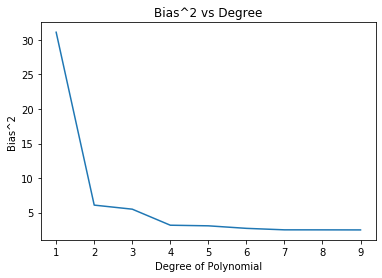

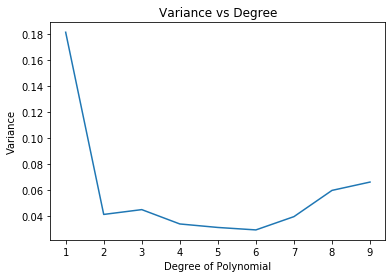

In [31]:
def main():
	datafile = open('./Q1_data/data.pkl',"rb");
	dataset = pickle.load(datafile)
	x=dataset[:,:-1]
	y=dataset[:,-1]
	y_dum=len(y)
	# print(y_dum)
	y=y.reshape(y_dum,1)
	x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)
	sz1=len(x_train)
	sz2=sz1/10
	sz2=int(sz2)
	x_test=x_test.reshape(len(x_test),1)
	x_train=x_train.reshape(len(x_train),1)
	y_test=y_test.reshape(len(y_test),1)
	y_train=y_train.reshape(len(y_train),1)
	x_train_subs=np.empty(shape=(10,sz2,1))
	y_train_subs=np.empty(shape=(10,sz2,1))
	for i in range(9):
		if(i==0):
		    y1=y_train
		    x12=x_train
		sz3=sz2/sz1
		# print(sz3,sz1)
		x22,x_train_subs[i],y2,y_train_subs[i]=train_test_split(x12,y1,test_size=sz3,random_state=0)
		sz1-=sz2
		y1=y2
		x12=x22
		# print(x12.shape,y1.shape)
	# print(x12.shape,y1.shape)
	# print(x12)
	x_train_subs[9]=x12
	y_train_subs[9]=y1
	reg=LinearRegression()
	bias_ar=np.empty(shape=(9,1))
	var_ar=np.empty(shape=(9,1))
	deg=np.empty(shape=(9,1))
	print("degree bias variance")
	for i in range(1,10):
		deg[i-1]=i
		print(i,end=" ")
		exp_values=np.empty(shape=(10,len(x_test),1))
		if(i>1):
			poly_fet = PolynomialFeatures(degree=i)
		for i1 in range(10):
			if(i==1):
				x_poly=x_train_subs[i1]
				x_tst=x_test
			else:
				x_poly=poly_fet.fit_transform(x_train_subs[i1])
				x_tst=poly_fet.fit_transform(x_test)
			reg.fit(x_poly,y_train_subs[i1])
			# print(reg.coef_)
			exp_values[i1]=reg.predict(x_tst)

		mean_bias_sq=bias(exp_values,y_test)
		mean_variance=variance(exp_values,y_test)
		bias_ar[i-1]=mean_bias_sq
		var_ar[i-1]=mean_variance
		print(mean_bias_sq,mean_variance)

	plt.plot(deg,bias_ar)
	plt.title("Bias^2 vs Degree")
	plt.xlabel("Degree of Polynomial")
	plt.ylabel("Bias^2")
	plt.show()

	plt.plot(deg,var_ar)
	plt.title("Variance vs Degree")
	plt.xlabel("Degree of Polynomial")
	plt.ylabel("Variance")
	plt.show()
	# plt.title("Bias")



if __name__ == '__main__':
	main()

Loads dataset from data.pk1
Divides them in the ratio of 90% for training and 10% testing
When the degree of polynomial is very low, our function is too simple and such a simple model can not fit our training dataset. Hence under-fitting. This won't be accurate on training dataset therefore initially value is bias is too high. And at this time as model is not good therefore accuracy on test dataset is also very low.


As the complexity of models increases , training accuracy goes on increasing till some limit as models fit more accurately to training dataset.So both training and test accuracy are good at this time therefore the value of variance is low which in the above graph is near 5. So both training and test accuracy are good at this time therefore the value of variance is low which in the above graph is near 3.

Alogorithm Used:

The very simplest case of a single scalar predictor variable x and a single scalar response variable y is known as simple linear regression. The extension to multiple and/or vector-valued predictor variables (denoted with a capital X) is known as multiple linear regression, also known as multivariable linear regression. Nearly all real-world regression models involve multiple predictors, and basic descriptions of linear regression are often phrased in terms of the multiple regression model. Note, however, that in these cases the response variable y is still a scalar. Another term, multivariate linear regression, refers to cases where y is a vector, i.e., the same as general linear regression.